In [2]:
from manim import *
# config.media_width = "75%"
config.verbosity = "WARNING"
config.background_color = WHITE

color_off = GRAY_A
color_on = BLACK

In [37]:
def set_the_stage(scene: Scene):
    agv = RoundedRectangle(corner_radius=0.5, height=4.0, width=8.0, stroke_color=BLACK)
    scene.add(agv)
    leds_back = []
    leds_front = []
    for i in range(-5, 6, 1):
        led = Dot(point=[-4.2, i * 0.3, 0.], color=GRAY_A, fill_opacity=0.9)
        scene.add(led)
        leds_back.append(led)
        led = Dot(point=[4.2, i * 0.3, 0.], color=GRAY_A, fill_opacity=0.9)
        scene.add(led)
        leds_front.append(led)

    leds_left = []
    leds_right = []
    for i in range(-12, 13, 1):
        led = Dot(point=[i * 0.3, -2.2, 0], color=GRAY_A, fill_opacity=0.9)
        leds_right.append(led)
        scene.add(led)
        led = Dot(point=[i * 0.3, 2.2, 0], color=GRAY_A, fill_opacity=0.9)
        leds_left.append(led)
        scene.add(led)

    # led = Dot(point=[0, -2.2, 0], color=GRAY_A, fill_opacity=0.9)
    # scene.add(led)

Manim Community v0.18.1

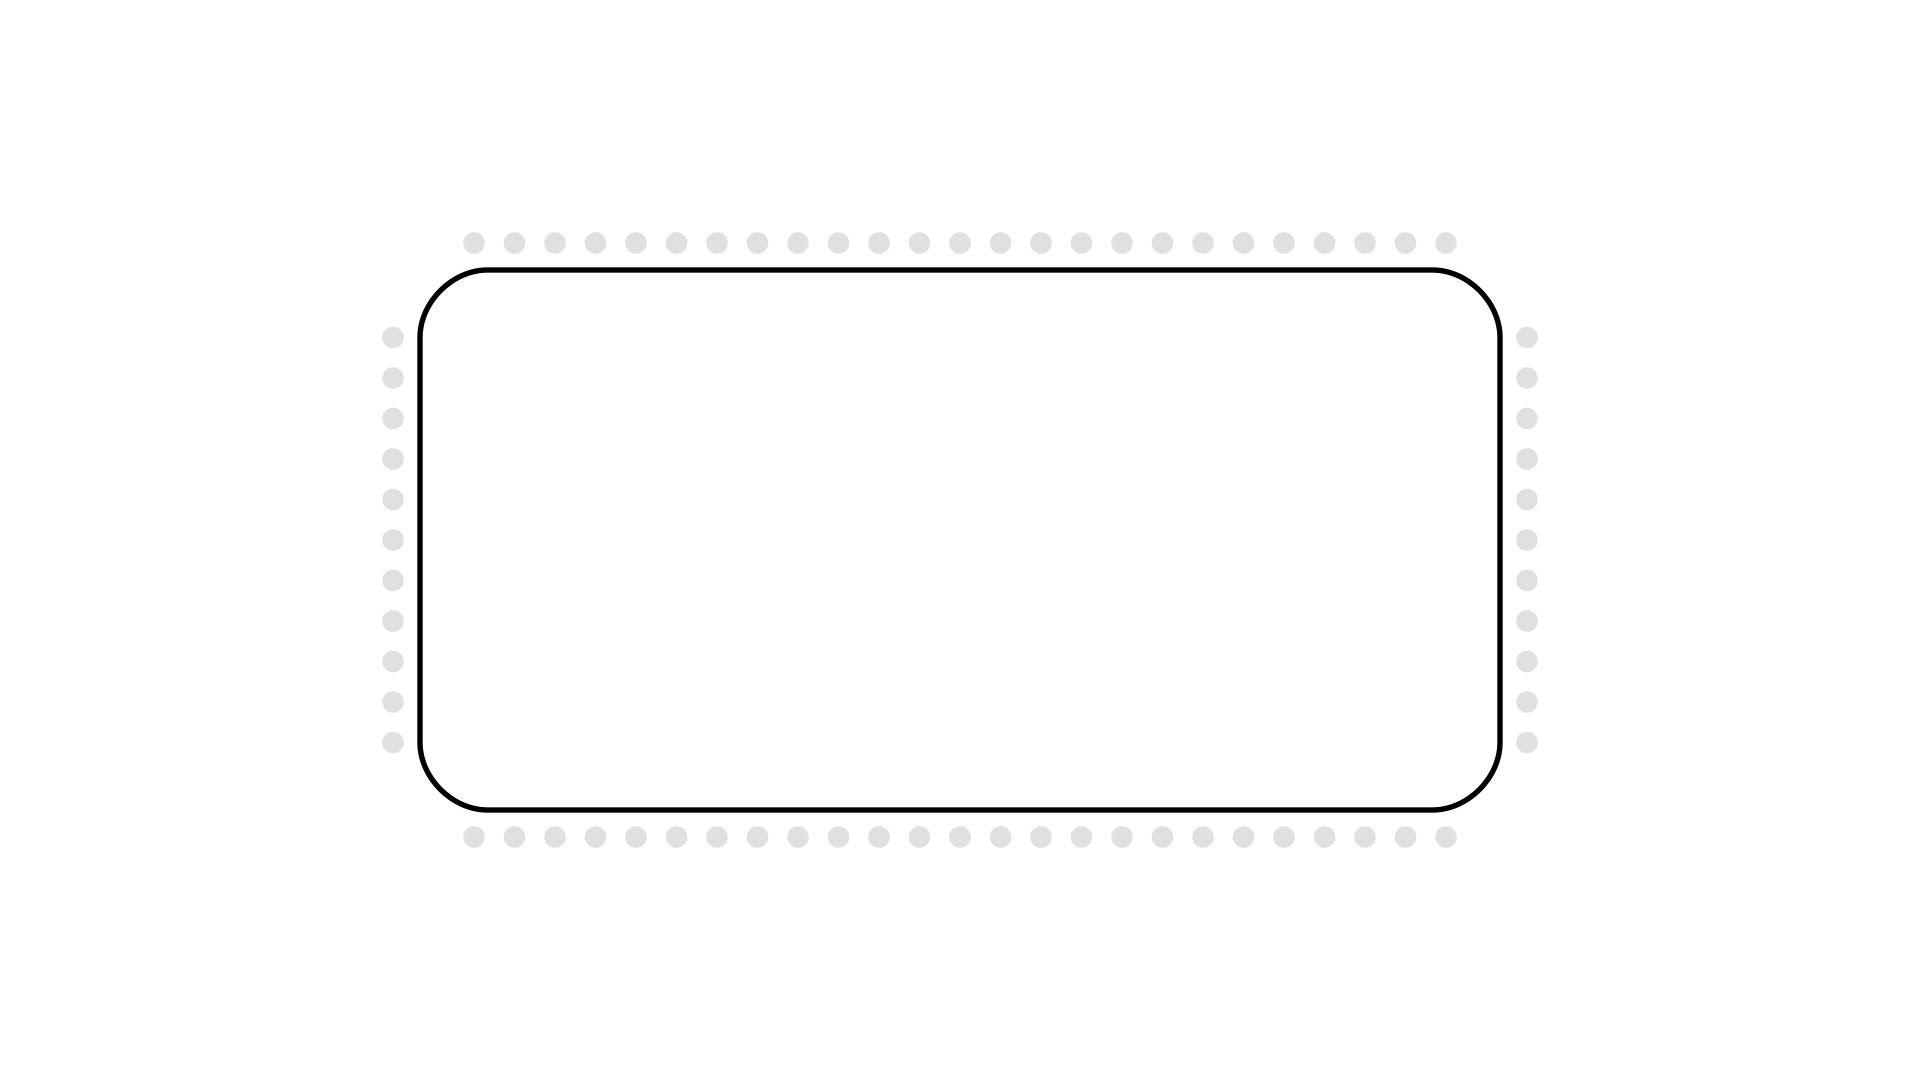

In [38]:
%%manim -qh Trial
class Trial(Scene):
    def construct(self):
        set_the_stage(self)